In [1]:
#データの取得と成形

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("s&p_tweets.csv")
data.head()

,key,value,text
0,2020-04-21,2736.56,RT @SexCounseling: How apropos that the Witch ...
1,2020-04-21,2736.56,RT @SexCounseling: @realDonaldTrump The States...
2,2020-04-21,2736.56,We will never let the great U.S. Oil &amp; Gas...
3,2020-04-21,2736.56,96% Approval Rating in the Republican Party. T...
4,2020-04-21,2736.56,"I’ve had great “ratings” my whole life, there’..."


In [3]:
#https://yottagin.com/?p=4360

import nltk

tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
for tweet in data["text"][:5]:
    print (tweet_tokenizer.tokenize(tweet))

['rt', ':', 'how', 'apropos', 'that', 'the', 'witch', 'is', 'behind', 'the', 'witch', 'hunt', '.']
['rt', ':', 'the', 'states', 'need', 'to', 'step', 'up', 'their', 'own', 'testing', 'and', 'take', 'responsibility', 'and', 'if', 'they', "can't", ',', 'perhaps', 'the', 'pol', '…']
['we', 'will', 'never', 'let', 'the', 'great', 'u', '.', 's', '.', 'oil', '&', 'gas', 'industry', 'down', '.', 'i', 'have', 'instructed', 'the', 'secretary', 'of', 'energy', 'and', 'secretary', 'of', 'the', 'treasury', 'to', 'formulate', 'a', 'plan', 'which', 'will', 'make', 'funds', 'available', 'so', 'that', 'these', 'very', 'important', 'companies', 'and', 'jobs', 'will', 'be', 'secured', 'long', 'into', 'the', 'future', '!']
['96', '%', 'approval', 'rating', 'in', 'the', 'republican', 'party', '.', 'thank', 'you', '!', 'this', 'must', 'also', 'mean', 'that', ',', 'most', 'importantly', ',', 'we', 'are', 'doing', 'a', 'good', '(', 'great', ')', 'job', 'in', 'the', 'handling', 'of', 'the', 'pandemic', '.']
[

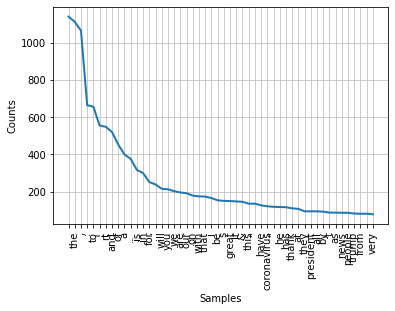

In [4]:
words = []
for tweet in data["text"]:
    words += tweet_tokenizer.tokenize(tweet)

fdist = nltk.FreqDist(words)
fdist.plot(50)

In [5]:
df_fdist = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])
df_fdist

,Word,Frequency
0,.,1139
1,the,1111
2,",",1064
3,:,664
4,to,656
5,!,555
6,rt,548
7,and,520
8,of,453
9,a,400


In [6]:
import re
#RTから始まる部分を削除
tweet = re.sub(r'^RT[\s]+', '', tweet)
#リンクを削除
tweet = re.sub(r'^RT[\s]+', '', tweet)
#ハッシュダグを削除
tweet = re.sub(r'#', '', tweet)
#Punctionを除去
import string
punctuations = string.punctuation
punctuations
#互換への変換
stemmer = nltk.stem.PorterStemmer()

In [7]:
import nltk
#nltk.download('stopwords')

In [8]:
import re
import string

stemmer = nltk.stem.PorterStemmer()
punctuations = string.punctuation
all_tweets_clean = []

#Tweet毎にリスト形式で保存するための加工
result=[]

for tweet in data["text"]:
    # RTから始まる部分を取り除く。
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # リンクを取り除く。
    tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
    # ハッシュタグを取り除く。
    tweet = re.sub(r'#', '', tweet)
    # 単語に分解する。
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    result.append(tweet_tokens)
    
#    tweets_clean = []
#   for word in tweet_tokens:
#        if (word not in stopwords and # stopwordsを除去する。
#               word not in punctuations): # punctuationを除去する。
#            #stem_word = stemmer.stem(word) # 単語を語幹に変形する。
#            tweets_clean.append(word)
#            all_tweets_clean += tweets_clean
            
#fdist_all_tweets_clean = nltk.FreqDist(all_tweets_clean)
#fdist_all_tweets_clean.plot(50)

In [9]:
#Word2Vec

from gensim.models import word2vec

unable to import 'smart_open.gcs', disabling that module


In [10]:
# 対象データをLinseSentence(one sentence = one lineとして扱う)で読み込む

sentences = result
sentences[0]

[':',
 'how',
 'apropos',
 'that',
 'the',
 'witch',
 'is',
 'behind',
 'the',
 'witch',
 'hunt',
 '.']

In [ ]:
# skip-gramモデルの学習
skipgram_model = word2vec.Word2Vec(sentences,
                                   sg=1,
                                   size=300,
                                   min_count=5,
                                   window=15, seed=1234)

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
# 作成したモデルの保存
skipgram_model.save("skipgram_w2v.model")
# saveしたモデルを読み込む時は
# model = word2vec.Word2Vec.load("./skipgram_w2v.model")

In [ ]:
# Virusと似たキーワードを見つけていきます。
# ここで記載しているscoreは、単語同士のコサイン類似度です。
pd.DataFrame(skipgram_model.wv.most_similar(
    positive=["coronavirus"]), columns=["keyword", "score"])